## Bayesian Optimisation Verification

In [5]:
# import relevant packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error
# stop showing warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Setup data for training and evaluation
X_ = np.linspace(0,5000, 5000)
# import timestamp from data sheet (time:0~5000s) 
address = 'data/degradation.xlsx'
df_time = X_
# import data sheet at 85 C (time:0~5000s) 
df = pd.read_excel(address,sheet_name = 'normal data',usecols = [3],names = None,nrows = 5000)
df_85 = df.values.tolist() 
df = pd.read_excel(address,sheet_name = 'smooth data',usecols = [3],names = None,nrows = 5000)
df_85s = df.values.tolist()
# Format date into numpy array format
y_normal = np.array(df_85).T 
y_normal = y_normal.reshape((5000))
x_normal = X_
x_7_5000 = np.array([0,99,999,1999,2999,3999,4999])

In [8]:
# Plot function to show performance of gp prediction
def plot_performance(list_NOISE_LEVEL,performance_parameter):
    plt.figure()
    plt.plot(list_NOISE_LEVEL, performance_parameter, c='blue', lw=2, zorder=3)
    plt.scatter(list_NOISE_LEVEL, performance_parameter, c='red', s=10, zorder=4)
    plt.xscale('log')
    plt.tick_params(axis='y', colors = 'white')
    plt.tick_params(axis='x', colors = 'white')
    plt.ylabel('Performance parameter',color = 'white')
    plt.xlabel('Number of data points',color = 'white')
    # plt.ylim(0,0.00001)
    # plt.title('Performance of gp',color ='white')
    plt.tight_layout()
    plt.show()

In [3]:
# Plot function to show confidence bounds 
def plot(X_,y_normal,X,y_mean, sigma,gp):
    plt.figure()
    plt.plot(X_, y_mean, c='blue', lw=1, zorder=4, label='Prediction')
    plt.scatter(X[:, 0], Y, c='r', s=5, zorder=3,label='Trained data')
    plt.fill_between(X_, y_mean - 1.9600 * sigma,y_mean + 1.9600 * sigma,
                        alpha=0.5,color='grey',zorder=1, label='95% confidence interval')
    plt.scatter(X_,y_normal,c='lightblue',s=1,zorder=2, label='Experiment data')
    plt.tick_params(axis='y', colors = 'white')
    plt.tick_params(axis='x', colors = 'white')
    plt.ylabel('Lifetime',color = 'white')
    plt.xlabel('Time',color = 'white')
    plt.title("Initial: %s\nOptimum: %s\nLog marginal likelihood: %s" % 
                (kernel, gp.kernel_,gp.log_marginal_likelihood(gp.kernel_.theta)),
                color ='white')
    plt.legend()
    plt.tight_layout()
    plt.show()

Number of data points used: 6
Mean squared error: 3.921171146979e-06
Log marginal likelihood: 12.810340363885814


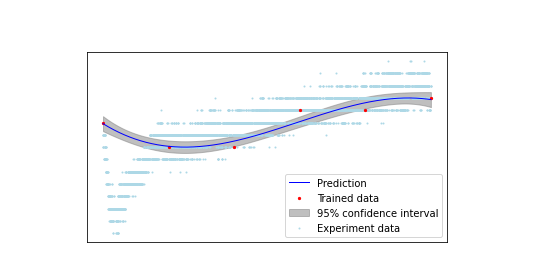

Number of data points used: 7
Mean squared error: 4.432887814564461e-06
Log marginal likelihood: 28.092127100265287


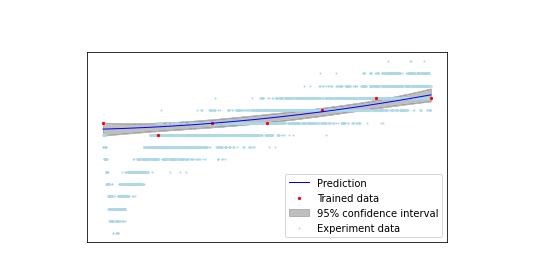

Number of data points used: 8
Mean squared error: 4.111715619722138e-06
Log marginal likelihood: 17.96132226715994


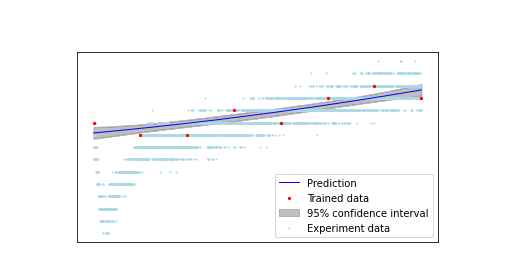

Number of data points used: 9
Mean squared error: 3.3814076153065155e-06
Log marginal likelihood: 28.602106780298826


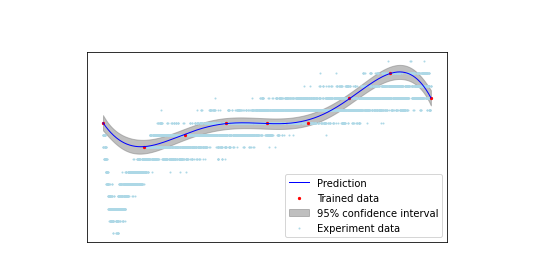

Number of data points used: 10
Mean squared error: 2.8731441777036626e-06
Log marginal likelihood: 30.399896986788647


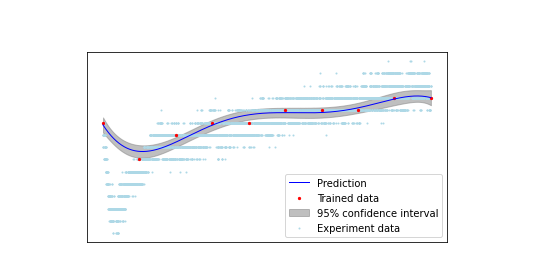

Number of data points used: 12
Mean squared error: 2.085157331301109e-06
Log marginal likelihood: 24.08658463389282


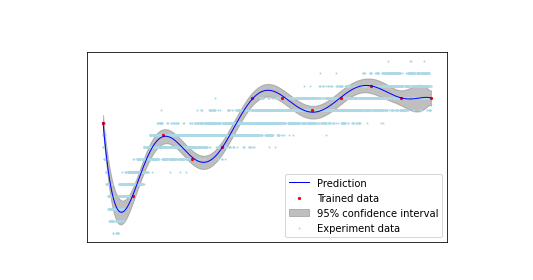

Number of data points used: 15
Mean squared error: 1.3779655478563861e-06
Log marginal likelihood: 38.665267531620955


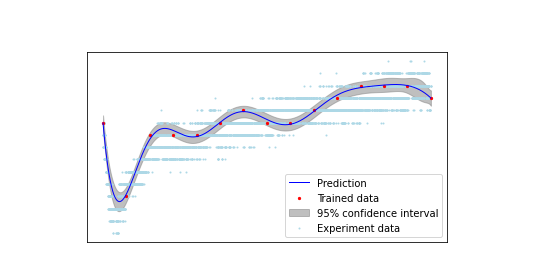

Number of data points used: 20
Mean squared error: 1.2078534979203423e-06
Log marginal likelihood: 45.693733140426076


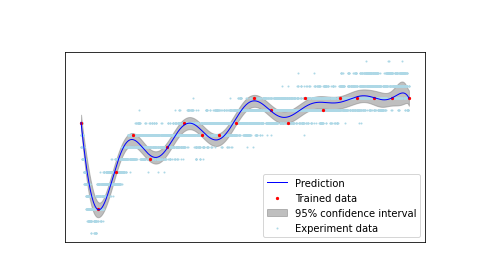

Number of data points used: 24
Mean squared error: 1.0273638675780411e-06
Log marginal likelihood: 79.09605462912158


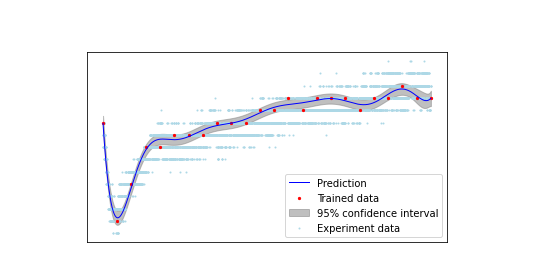

Number of data points used: 30
Mean squared error: 1.138922024884834e-06
Log marginal likelihood: 96.14487689163482


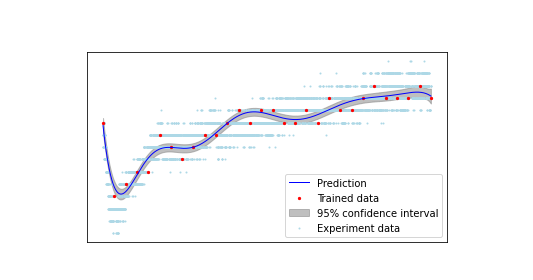

Number of data points used: 33
Mean squared error: 1.1012378184848945e-06
Log marginal likelihood: 91.8034723874679


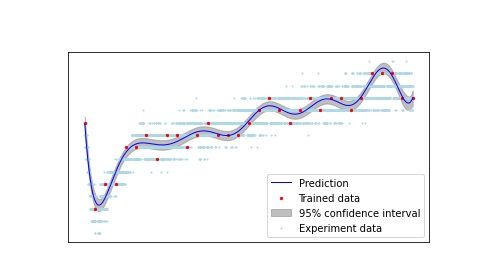

Number of data points used: 37
Mean squared error: 9.568593785509157e-07
Log marginal likelihood: 136.20329363460021


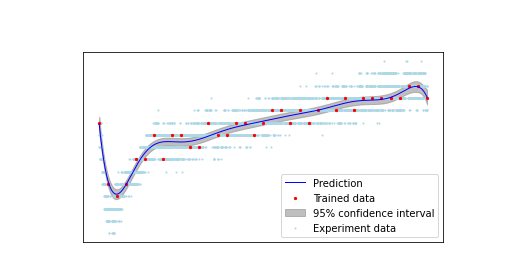

Number of data points used: 40
Mean squared error: 1.132144349929269e-06
Log marginal likelihood: 98.70132758755841


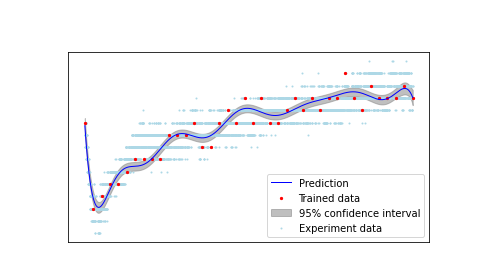

Number of data points used: 45
Mean squared error: 1.1132290180934417e-06
Log marginal likelihood: 99.85589251999744


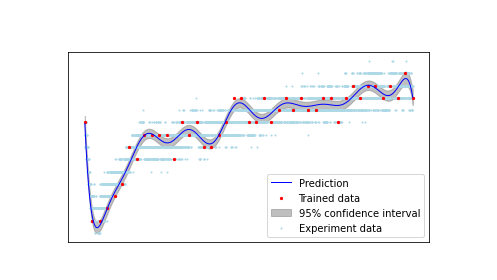

Number of data points used: 50
Mean squared error: 9.642113903880601e-07
Log marginal likelihood: 147.96283308223408


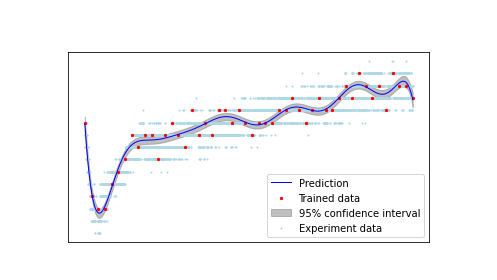

Number of data points used: 60
Mean squared error: 1.1352653020021069e-06
Log marginal likelihood: 121.75775301978047


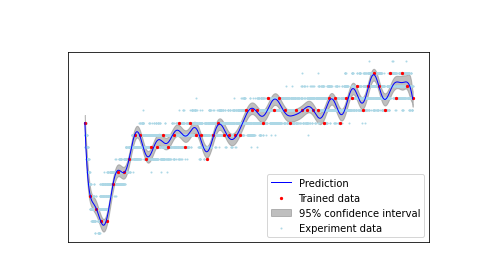

Number of data points used: 80
Mean squared error: 8.78560507323143e-07
Log marginal likelihood: 261.0779382989474


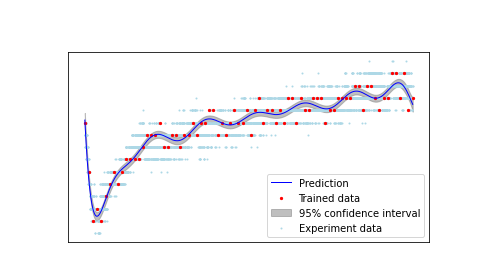

Number of data points used: 100
Mean squared error: 8.300034040190396e-07
Log marginal likelihood: 292.65514786121497


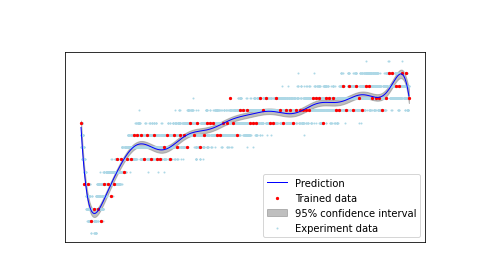

Number of data points used: 200
Mean squared error: 8.293955546865139e-07
Log marginal likelihood: 726.6879954451366


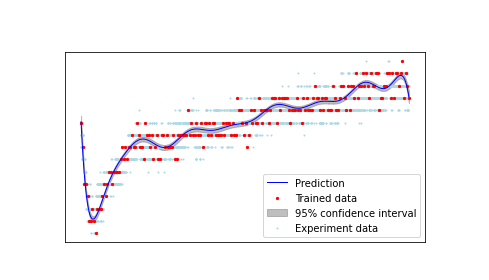

Number of data points used: 250
Mean squared error: 7.864994212911564e-07
Log marginal likelihood: 729.3174801342952


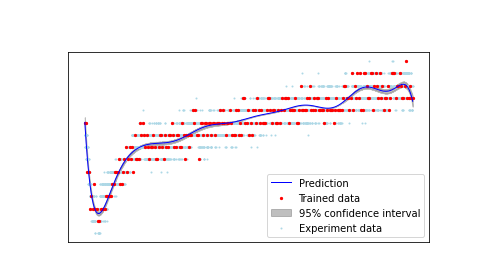

Number of data points used: 300
Mean squared error: 7.667557159539338e-07
Log marginal likelihood: 1061.2193517429826


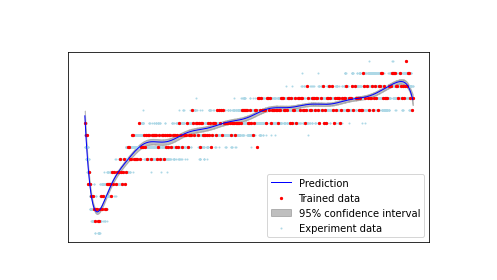

Number of data points used: 400
Mean squared error: 7.564772903863618e-07
Log marginal likelihood: 1337.2517224084124


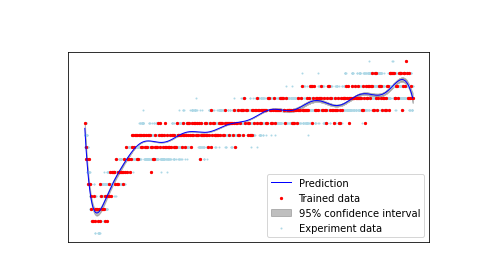

Number of data points used: 500
Mean squared error: 7.404247634271877e-07
Log marginal likelihood: 1631.4380823012964


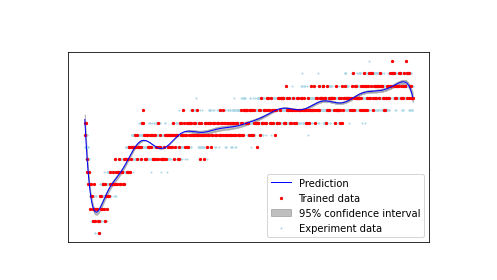

Number of data points used: 600
Mean squared error: 7.230950349393325e-07
Log marginal likelihood: 2092.365506670924


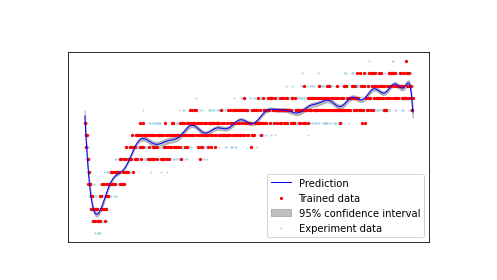

Number of data points used: 700
Mean squared error: 7.16497156621695e-07
Log marginal likelihood: 2299.8206418257855


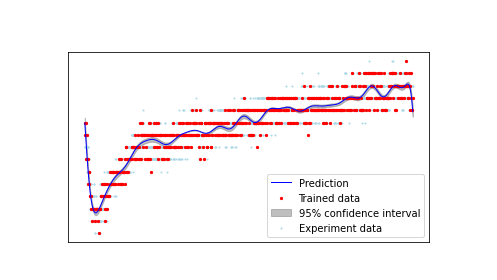

Number of data points used: 800
Mean squared error: 7.107835887917685e-07
Log marginal likelihood: 2859.100157963238


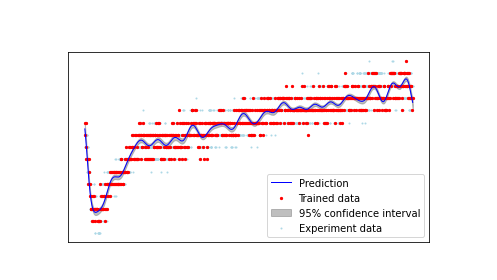

Number of data points used: 1000
Mean squared error: 7.028884238023323e-07
Log marginal likelihood: 3361.425168004062


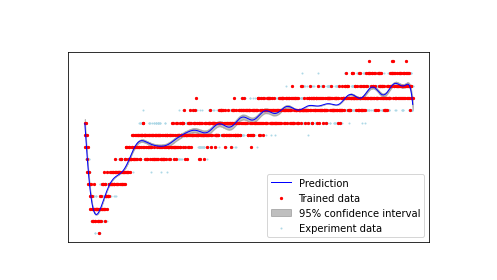

Number of data points used: 1200
Mean squared error: 6.90110817864316e-07
Log marginal likelihood: 4222.060345966432


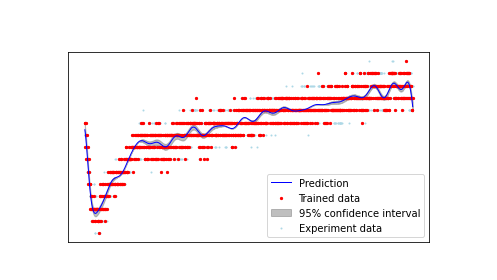

Number of data points used: 1400
Mean squared error: 6.879013180963418e-07
Log marginal likelihood: 5101.114410158379


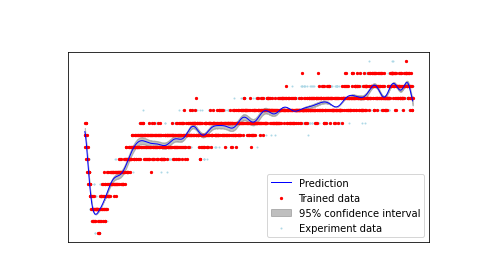

Number of data points used: 1700
Mean squared error: 6.726395204182912e-07
Log marginal likelihood: 5947.225118237438


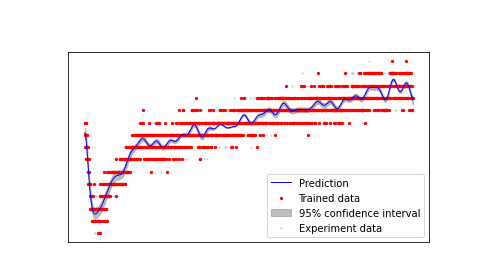

Number of data points used: 2000
Mean squared error: 6.094747107186309e-07
Log marginal likelihood: 7158.7850217035075


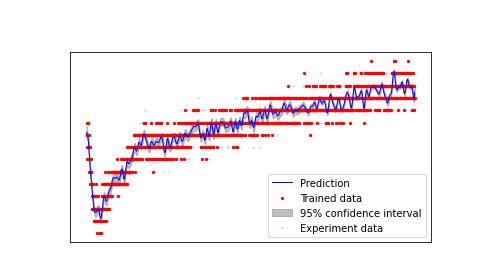

Number of data points used: 2500
Mean squared error: 6.308343907562523e-07
Log marginal likelihood: 9055.231034904136


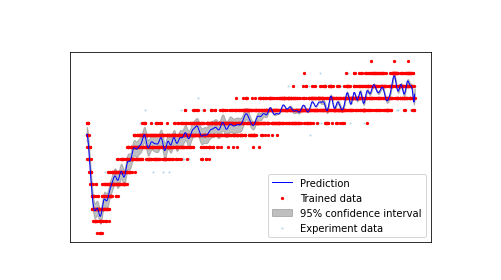


Mean squared error


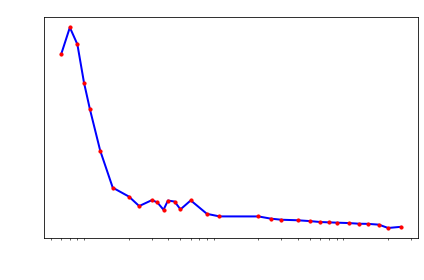

Log marginal likelihood


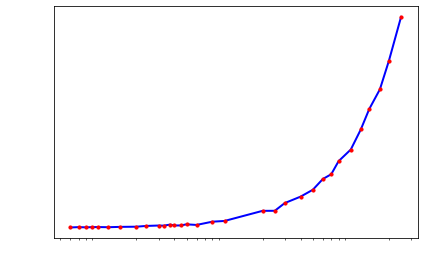

In [16]:
# Ploting how noise level would affect gp's performance

# Prepare a list of noise levels to test
# list_NOISE_LEVEL = np.array([])
# for i in range(-20,2): 
#     list_NOISE_LEVEL = np.append(list_NOISE_LEVEL,10**i)
# Set up performance parameters set
list_mse = np.array([])
list_lml = np.array([])

# NUM_OF_DATA_POINTS = 20
NOISE_LEVEL = 10e-20
length_scale_bounds_MAX = 10e4
length_scale_bounds_MIN = 10e-10
# 
list_DATA_POINTS = (6,7,8,9,10,12,15,20,24,30,33,37,40,45,50,60,80,100,200,250,300,400,500,600,700,800,1000,1200,1400,1700,2000,2500)
for NUM_OF_DATA_POINTS in list_DATA_POINTS: 
    # Have data points evenly spread
    X = np.arange(0,4998,5000/(NUM_OF_DATA_POINTS-1)).astype(int)
    X = np.append(4999,X)
    # Randomly chosed data points
    # X = np.random.randint(5000, size=NUM_OF_DATA_POINTS)
    X = X.reshape(X.size,1)
    Y = y_normal[X]
    print('Number of data points used:', X.size)

    # Kernel setting
    kernel = 1.0 * RBF(length_scale=300) + WhiteKernel(noise_level=NOISE_LEVEL, noise_level_bounds=(1e-20, 10e-4))
    gp = GaussianProcessRegressor(kernel=kernel,alpha=10e-8).fit(X, Y)
    y_mean, sigma = gp.predict(X_[:, np.newaxis],  return_std=True)
    y_mean = y_mean.reshape(5000)
    sigma = sigma.reshape(5000)

    # print('Noise level =',NOISE_LEVEL)
    # print ('Average absolute error:',
    # np.format_float_scientific(np.mean(np.absolute(y_normal-y_mean)),precision=5))
    # print ('Average percentage error:', np.format_float_positional(np.mean(np.absolute((y_normal-y_mean)/y_normal*100)),precision=4),'%')
    mse = mean_squared_error(y_normal,y_mean)
    print ('Mean squared error:', mse)
    lml = gp.log_marginal_likelihood(gp.kernel_.theta)
    print ('Log marginal likelihood:', lml)

    plot(X_,y_normal,X,y_mean, sigma,gp)

    list_mse = np.append(list_mse,mse)
    list_lml = np.append(list_lml,lml)

# plot relevant graphs
print('\nMean squared error')
plot_performance(list_DATA_POINTS,list_mse)
print('Log marginal likelihood')
plot_performance(list_DATA_POINTS,list_lml)